In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240919152121_llm_gen.jsonl"
jsonl_path="data/initial_train_data/20240919161042_llm_gen.jsonl"
df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-61.00,"N,N-Dimethylformamide",CN(C)C=O,Melting temperature,[oC],170.0,To predict the melting temperature of Compound...,3.786885
1,77.00,4-pyrimidinemethanol,c1cncnc1CO,Melting temperature,[oC],105.0,To predict the melting temperature of Compound...,0.363636
2,67.00,2-cyanobenzenesulfonyl chloride,c1ccc(c(c1)C#N)S(=O)(=O)Cl,Melting temperature,[oC],129.0,To predict the melting temperature of Compound...,0.925373
3,131.00,"6-chloro-2,3-dihydro-3-oxo-4h-1,4-benzoxazine-...",c1cc2c(cc1Cl)N(C(=O)CO2)CCC#N,Melting temperature,[oC],130.5,To predict the melting temperature of 6-chloro...,0.003817
4,104.25,"1,3-cyclohexanedione",C1CC(=O)CC(=O)C1,Melting temperature,[oC],50.0,Compound X consists of two carbonyl groups att...,0.520384
...,...,...,...,...,...,...,...,...
67467,76.00,"2,3,3-trichloro-2-propenoic acid",Cl/C(Cl)=C(/Cl)C(=O)O,Melting temperature,[oC],180.0,To predict the melting temperature of Compound...,1.368421
67468,200.00,4-{(2E)-2-[cyano(1-methyl-1H-benzimidazol-2-yl...,O=C(O)c1ccc(NN=C(C#N)c2[nH0]c3ccccc3[nH0]2C)cc1,Melting temperature,[oC],282.0,To predict the melting point of the given comp...,0.410000
67469,98.00,N-boc-2-(2-naphthyl)-D-alanine,C[C@](c1ccc2ccccc2c1)(C(=O)O)NC(=O)OC(C)(C)C,Melting temperature,[oC],240.0,To predict the melting temperature of Compound...,1.448980
67470,-26.20,"thiophene, 2,3,4-trimethyl-",Cc1scc(C)c1C,Melting temperature,[oC],130.0,To predict the melting temperature of Compound...,5.961832


<Axes: xlabel='error_rate', ylabel='Count'>

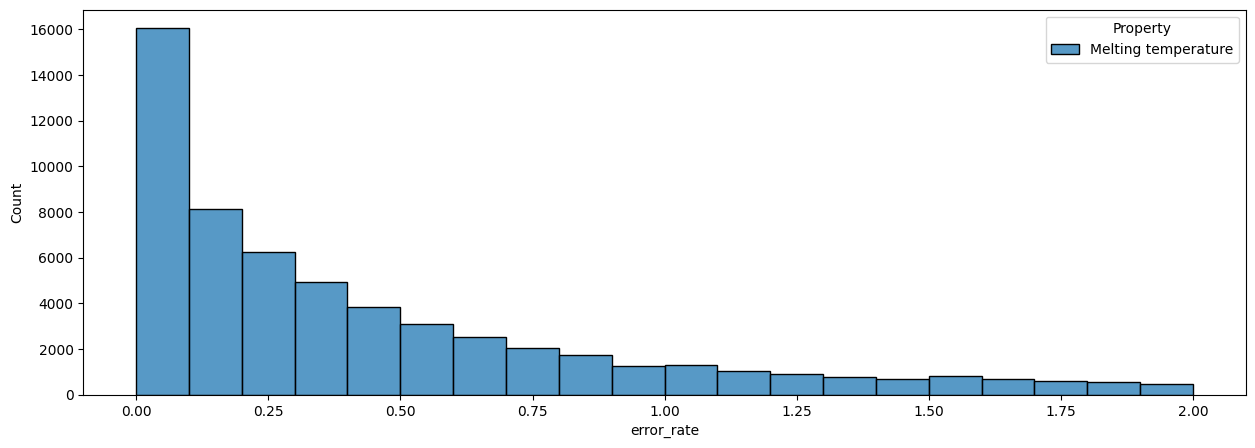

In [2]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)

In [3]:
for t in sorted(list(set(df["Property"]))):
    print(t)

Melting temperature


In [4]:

df["error_rate"].median()

0.36612021857923505

In [8]:

error_threshold=0.05
max_records=200

df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df=df.sort_values(by="error_rate")
df["cond"]=df["CompoundName"]+" "+df["SMILES"]+" "+df["Property"]
df=df.drop_duplicates(subset=["cond"])
df=df[df["error_rate"]<error_threshold]
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate,cond
7029,70.00,"2,4-Dimethoxychalcone",O=C(C=Cc1ccc(OC)cc1OC)c1ccccc1,Melting temperature,[oC],70.0,"To predict the melting point of Compound X, we...",0.000000,"2,4-Dimethoxychalcone O=C(C=Cc1ccc(OC)cc1OC)c1..."
65062,80.00,N-benzyloxycarbonyl-l-threonine benzyl ester,CC([C@@H](C(=O)OCc1ccccc1)NC(=O)OCc2ccccc2)O,Melting temperature,[oC],80.0,To predict the melting temperature of Compound...,0.000000,N-benzyloxycarbonyl-l-threonine benzyl ester C...
65063,1.00,Diethyl (2E)-but-2-enedioate,O=C(/C=C/C(=O)OCC)OCC,Melting temperature,[oC],1.0,To predict the melting temperature of Compound...,0.000000,Diethyl (2E)-but-2-enedioate O=C(/C=C/C(=O)OCC...
65066,125.00,3-Aminophenol,Nc1cccc(O)c1,Melting temperature,[oC],125.0,To predict the melting temperature of Compound...,0.000000,3-Aminophenol Nc1cccc(O)c1 Melting temperature
65070,250.00,N-(4-{(E)-2-[1-(4-methylphenyl)-5-nitro-1H-ben...,O=[N+]([O-])c1ccc2[nH0](c3ccc(C)cc3)c([nH0]c2c...,Melting temperature,[oC],250.0,"The given compound, Compound X, contains sever...",0.000000,N-(4-{(E)-2-[1-(4-methylphenyl)-5-nitro-1H-ben...
...,...,...,...,...,...,...,...,...,...
28870,231.50,"9-Fluoro-6,7-dihydro-5,8-dimethyl-1-oxo-1H,5H-...",Fc1cc2C(=O)C(=CN3c2c(CCC3C)c1C)C(=O)O,Melting temperature,[oC],220.0,To predict the melting temperature of Compound...,0.049676,"9-Fluoro-6,7-dihydro-5,8-dimethyl-1-oxo-1H,5H-..."
3954,181.00,adipic dihydrazide,C(CCC(=O)NN)CC(=O)NN,Melting temperature,[oC],190.0,To predict the melting temperature of Compound...,0.049724,adipic dihydrazide C(CCC(=O)NN)CC(=O)NN Meltin...
314,181.00,nifurtimox,O=S2(=O)CC(C)N(/N=C/c1ccc(o1)[N+]([O-])=O)CC2,Melting temperature,[oC],190.0,To predict the melting temperature of Compound...,0.049724,nifurtimox O=S2(=O)CC(C)N(/N=C/c1ccc(o1)[N+]([...
2091,157.85,Phenazine,n1c3c(nc2c1cccc2)cccc3,Melting temperature,[oC],150.0,Compound X consists of fused benzene and pyrid...,0.049731,Phenazine n1c3c(nc2c1cccc2)cccc3 Melting tempe...
